# Algorithms statistics

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os

In [52]:
SEPARATHOR = ','
FILE_PATH = '../tests/all_results.csv'

In [53]:
df = pd.read_csv(FILE_PATH, sep=SEPARATHOR)

In [54]:
df.sample(1)

,game_type,player1,player2,winner,seed
116,othello,greedy,alphabeta3,2,22021071


In [55]:
assert len(df[df.duplicated()]) == 0, 'Duplicated records in the results file.'

# Othello

In [56]:
df_othello = df[df['game_type']=='othello']

In [77]:
assert sum(df_othello["player2"].unique() == df_othello["player1"].unique()), 'Different players arrays'

In [101]:
othello_results_dict = dict()
for player_name in df_othello["player1"].unique():
    othello_results_dict[player_name] = [0,0,0]

for key in othello_results_dict.keys():
    # wins
    othello_results_dict[key][0] += len(df_othello.loc[(df_othello['player1'] == key) & (df_othello['winner'] == 1)])
    othello_results_dict[key][0] += len(df_othello.loc[(df_othello['player2'] == key) & (df_othello['winner'] == 2)])
    # draws
    othello_results_dict[key][1] += len(df_othello.loc[(df_othello['player1'] == key) & (df_othello['winner'] == 0)])
    othello_results_dict[key][1] += len(df_othello.loc[(df_othello['player2'] == key) & (df_othello['winner'] == 0)])
    # losses
    othello_results_dict[key][2] += len(df_othello.loc[(df_othello['player1'] == key) & (df_othello['winner'] == 2)])
    othello_results_dict[key][2] += len(df_othello.loc[(df_othello['player2'] == key) & (df_othello['winner'] == 1)])

In [102]:
othello_results_dict

{'mcts100': [29, 3, 28],
 'mctsrave100': [27, 2, 31],
 'mapbaseheuothello': [48, 1, 11],
 'greedy': [0, 10, 50],
 'random': [28, 2, 30],
 'alphabeta3': [38, 2, 20]}

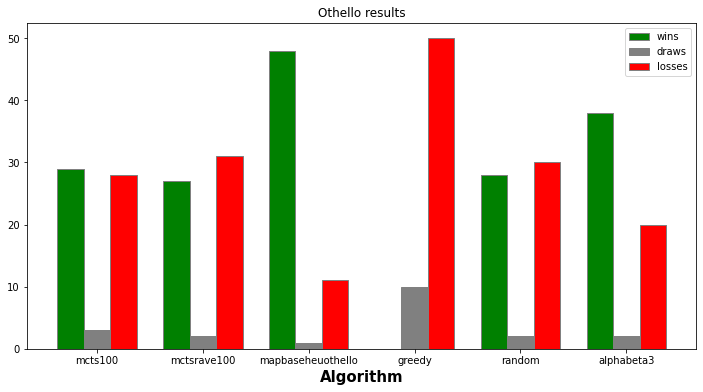

In [121]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 6))
 
# set height of bar
wins = [v[0] for v in othello_results_dict.values()]
draws = [v[1] for v in othello_results_dict.values()]
losses = [v[2] for v in othello_results_dict.values()]

names = othello_results_dict.keys()
 
# Set position of bar on X axis
br1 = np.arange(len(wins))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, wins, color ='g', width = barWidth,
        edgecolor ='grey', label ='wins')
plt.bar(br2, draws, color ='grey', width = barWidth,
        edgecolor ='grey', label ='draws')
plt.bar(br3, losses, color ='r', width = barWidth,
        edgecolor ='grey', label ='losses')
 
# Adding Xticks
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(wins))], names)
plt.title("Othello results")
 
plt.legend()
plt.show()